In [131]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt

## Implementing Environment

In [132]:
class MazeEnv(gym.Env):
  def __init__(self, multi_agent = False):
    self.multi_agent = multi_agent
    self.action_space = spaces.Discrete(8)
    self.observation_space = spaces.Box(low=0,
    high=10,
    shape=(11, 10),
    dtype=np.int16)
    self.reward_range = (-200, 200)
    self.current_episode = 0
    self.success_episode = []

  def reset(self):
    self.current_player = 1
    # P means the game is playable, W means somenone wins, L someone lose
    self.state = 'P'
    self.current_step = 0
    self.max_step = 200
    if self.multi_agent:
      self.world = np.array([[1, 0, 0, 3, 3, 0, 0, 2],
                            [0, 0, 0, 3, 3, 0, 0, 0],
                            [0, 0, 0, 3, 3, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 4, 0, 0, 4, 0, 0]])
    else:
      self.world = np.array([[1, 0, 0, 3, 3, 3, 0, 0],
                            [0, 0, 0, 3, 3, 3, 0, 0],
                            [0, 0, 0, 3, 3, 3, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 4, 0, 0, 4, 0, 0]])
    return self._next_observation()

  def _next_observation(self):
    #obs = self.world
    #obs = np.append(obs, [[self.current_player, 0, 0, 0]], axis=0)

    return np.where(self.world == self.current_player)
  def _take_action(self, action):
        current_pos = np.where(self.world == self.current_player)

        if action == 0:
            next_pos = (current_pos[0] - 1, current_pos[1])

            if next_pos[0] >= 0 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[0] >= 0 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[0] >= 0 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[0] >= 0 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'

        elif action == 1:
            next_pos = (current_pos[0], current_pos[1] + 1)

            if next_pos[1] < self.world.shape[1]-1 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[1] < self.world.shape[1]-1 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[1] < self.world.shape[1]-1 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[1] < self.world.shape[1]-1 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'

        elif action == 2:
            next_pos = (current_pos[0] + 1, current_pos[1])

            if next_pos[0] <= self.world.shape[0]-1 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[0] <= self.world.shape[0]-1 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[0] <= self.world.shape[0]-1 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[0] <= self.world.shape[0]-1 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'

        elif action == 3:
            next_pos = (current_pos[0], current_pos[1] - 1)

            if next_pos[1] >= 0 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[1] >= 0 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[1] >= 0 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[1] >= 0 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'
        elif action == 4:
            next_pos = (current_pos[0]-1, current_pos[1] - 1)

            if next_pos[1] >= 0 and next_pos[0] >= 0 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[1] >= 0 and next_pos[0] >= 0 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[1] >= 0 and next_pos[0] >= 0 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[1] >= 0 and next_pos[0] >= 0 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'

        elif action == 5:
            next_pos = (current_pos[0]+1, current_pos[1] - 1)

            if next_pos[1] >= 0 and next_pos[0] <= self.world.shape[0]-1 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[1] >= 0 and next_pos[0] <= self.world.shape[0]-1 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[1] >= 0 and next_pos[0] <= self.world.shape[0]-1 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[1] >= 0 and next_pos[0] <= self.world.shape[0]-1 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'
        elif action == 6:
            next_pos = (current_pos[0]+1, current_pos[1] + 1)
            if next_pos[0]>self.world.shape[0]-1 or next_pos[1]>self.world.shape[1]-1:
              pass
            if next_pos[1] <= self.world.shape[0]-1 and next_pos[0] <= self.world.shape[0]-1 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[1] <= self.world.shape[0]-1 and next_pos[0] <= self.world.shape[0]-1 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[1] <= self.world.shape[0]-1 and next_pos[0] <= self.world.shape[0]-1 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[1] <= self.world.shape[0]-1 and next_pos[0] <= self.world.shape[0]-1 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'
        elif action == 7:
            next_pos = (current_pos[0]-1, current_pos[1] + 1)

            if next_pos[1] <= self.world.shape[0]-1 and next_pos[0] >= 0 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[1] <= self.world.shape[0]-1 and next_pos[0] >= 0 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[1] <= self.world.shape[0]-1 and next_pos[0] >= 0 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[1] <= self.world.shape[0]-1 and next_pos[0] >= 0 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'
        

  def step(self, action):
        self._take_action(action)
        self.current_step += 1
        #print(self.world)

        if self.state == "W":
            #print(f'Player {self.current_player} won')
            reward = 400
            done = True
        elif self.state == 'L':
            #print(f'Player {self.current_player} lost')
            reward = -200
            done = True
        elif self.state == 'P':
            reward = -1
            done = False

        if self.current_step >= self.max_step:
            done = True
        if self.multi_agent:
          if self.current_player == 1:
            self.current_player = 2
          else:
            self.current_player = 1

        if done:
            #self.render_episode(self.state)
            self.current_episode += 1

        obs = self._next_observation()

        return obs, reward, done, {}


In [133]:
env = MazeEnv()


## SARSA

In [134]:
class sarsa_agent():
    def __init__(self, discount_factor, num_episodes, max_steps, environment):
        self.discount_factor = discount_factor
        self.num_episodes = num_episodes
        self.env = environment
        #self.alpha = alpha
        self.max_steps = max_steps
        
    def epsilon_greedy(self,Q, epsilon, n_actions, state):
        if np.random.rand() < epsilon:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax(Q[state, :])
        return action 

    def map_state(self, obs):
      index = obs[0][0] * self.env.world.shape[0] + obs[1][0]
      return index


    def sarsa(self,env, alpha, gamma,  episodes, max_steps):
        env.reset()
        n_states, n_actions = env.world.shape[0]*env.world.shape[1], env.action_space.n
        Q = np.zeros((n_states, n_actions))
        timestep_reward = []
        epsilon =0.4
        for episode in range(episodes):
            print(f"Episode: {episode}")
            total_reward = 0
            if (episode+1)% 1500 == 0 :
                  epsilon *= 0.5
            s = env.reset()
            s = self.map_state(s)
        #a = epsilon_greedy(Q, epsilon, n_actions, s)
            t = 0
            done = False
            while t< max_steps:
                #1000/(1000 + episode +1 )
                
                a = self.epsilon_greedy(Q, epsilon, n_actions, s)
                t += 1
                s_, reward, done, info = env.step(a)
                s_ = self.map_state(s_)
                #print(reward)
                total_reward += reward
                a_ = self.epsilon_greedy(Q, epsilon, n_actions, s_)
            
                Q[s, a] += alpha * ( reward + (gamma * Q[s_, a_] ) - Q[s, a] )
            
                s, a = s_, a_
                if done:
                
                    #t += 1
                    #s_, reward, done, info = env.step(a)
                    #total_reward += reward
                    #Q[s, a] += alpha * ( reward + (gamma * Q[s_, a_] ) - Q[s, a] )
                  
                    print('steps: ',t)
                    break
            timestep_reward.append(total_reward)
    
        return timestep_reward

    def take_action(self, alpha,discount_factor):
        
        rewards = self.sarsa(self.env, alpha, discount_factor, self.num_episodes,self.max_steps)
        
        return rewards

In [135]:
sarsa = sarsa_agent( 0.9, 8000,2500, env)

### For Different Alphas

In [ ]:
alphas = [0.2, 0.4, 0.6, 0.8, 0.9]
rewards = []
for a in alphas:
  sarsa_rewards = sarsa.take_action(a, 0.9)
  rewards.append(sarsa_rewards)

Streaming output truncated to the last 5000 lines.
Episode: 5500
steps:  8
Episode: 5501
steps:  8
Episode: 5502
steps:  12
Episode: 5503
steps:  9
Episode: 5504
steps:  8
Episode: 5505
steps:  7
Episode: 5506
steps:  7
Episode: 5507
steps:  7
Episode: 5508
steps:  8
Episode: 5509
steps:  8
Episode: 5510
steps:  7
Episode: 5511
steps:  7
Episode: 5512
steps:  7
Episode: 5513
steps:  7
Episode: 5514
steps:  9
Episode: 5515
steps:  7
Episode: 5516
steps:  7
Episode: 5517
steps:  7
Episode: 5518
steps:  10
Episode: 5519
steps:  8
Episode: 5520
steps:  8
Episode: 5521
steps:  8
Episode: 5522
steps:  8
Episode: 5523
steps:  8
Episode: 5524
steps:  8
Episode: 5525
steps:  8
Episode: 5526
steps:  10
Episode: 5527
steps:  7
Episode: 5528
steps:  7
Episode: 5529
steps:  7
Episode: 5530
steps:  8
Episode: 5531
steps:  7
Episode: 5532
steps:  7
Episode: 5533
steps:  7
Episode: 5534
steps:  7
Episode: 5535
steps:  7
Episode: 5536
steps:  7
Episode: 5537
steps:  7
Episode: 5538
steps:  8
Episode: 5

In [13]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

<function matplotlib.pyplot.plot>

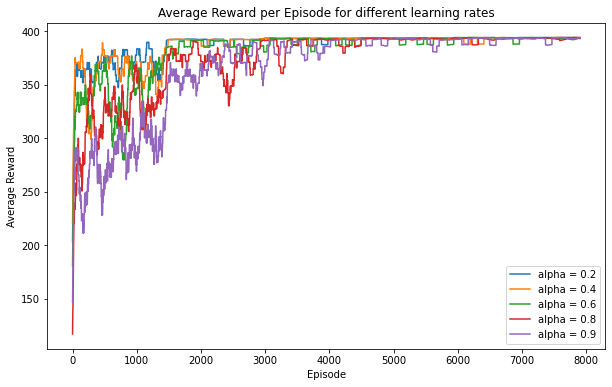

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(moving_average(rewards[0], n=100), label = 'alpha = 0.2')
plt.plot(moving_average(rewards[1], n=100), label = 'alpha = 0.4')
plt.plot(moving_average(rewards[2], n=100), label = 'alpha = 0.6')
plt.plot(moving_average(rewards[3], n=100), label = 'alpha = 0.8')
plt.plot(moving_average(rewards[4], n=100), label = 'alpha = 0.9')
plt.ylabel('Average Reward')
plt.xlabel('Episode')
plt.title("Average Reward per Episode for different learning rates")
plt.legend()
plt.plot()

### For Different Discount factors

In [ ]:
alphas = [0.2, 0.4, 0.6, 0.8, 0.9]
rewards = []
for a in alphas:
  sarsa_rewards = sarsa.take_action(0.2, a)
  rewards.append(sarsa_rewards)

Streaming output truncated to the last 5000 lines.
Episode: 5500
steps:  7
Episode: 5501
steps:  7
Episode: 5502
steps:  7
Episode: 5503
steps:  8
Episode: 5504
steps:  7
Episode: 5505
steps:  8
Episode: 5506
steps:  7
Episode: 5507
steps:  7
Episode: 5508
steps:  8
Episode: 5509
steps:  7
Episode: 5510
steps:  7
Episode: 5511
steps:  7
Episode: 5512
steps:  8
Episode: 5513
steps:  7
Episode: 5514
steps:  7
Episode: 5515
steps:  10
Episode: 5516
steps:  8
Episode: 5517
steps:  7
Episode: 5518
steps:  8
Episode: 5519
steps:  7
Episode: 5520
steps:  7
Episode: 5521
steps:  7
Episode: 5522
steps:  7
Episode: 5523
steps:  7
Episode: 5524
steps:  7
Episode: 5525
steps:  7
Episode: 5526
steps:  7
Episode: 5527
steps:  7
Episode: 5528
steps:  7
Episode: 5529
steps:  7
Episode: 5530
steps:  7
Episode: 5531
steps:  7
Episode: 5532
steps:  9
Episode: 5533
steps:  7
Episode: 5534
steps:  7
Episode: 5535
steps:  7
Episode: 5536
steps:  7
Episode: 5537
steps:  7
Episode: 5538
steps:  7
Episode: 553

<function matplotlib.pyplot.plot>

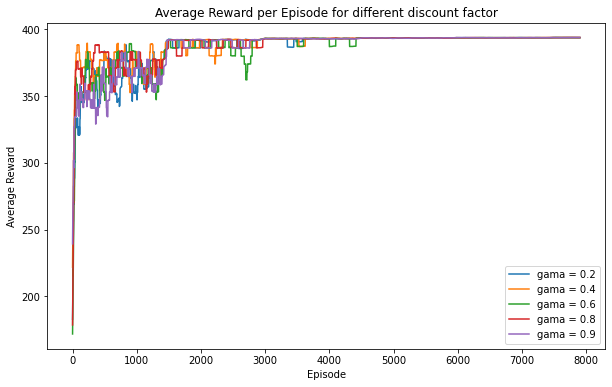

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(moving_average(rewards[0], n=100), label = 'gama = 0.2')
plt.plot(moving_average(rewards[1], n=100), label = 'gama = 0.4')
plt.plot(moving_average(rewards[2], n=100), label = 'gama = 0.6')
plt.plot(moving_average(rewards[3], n=100), label = 'gama = 0.8')
plt.plot(moving_average(rewards[4], n=100), label = 'gama = 0.9')
plt.ylabel('Average Reward')
plt.xlabel('Episode')
plt.title("Average Reward per Episode for different discount factor")
plt.legend()
plt.plot()

In [14]:
def map_state(obs):
  index = obs[0][0] * env.world.shape[0] + obs[1][0]
  return index


In [15]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools
import pickle

## Actor Critic Without Function Approximation

In [137]:

# Actor Critic Algorithm class
class Actor_Critic(object):
    # Main class to train the TD algorithm for the n number of episodes
    # the class takes the policy, alpha and lambda as the input
    def __init__(self, gamma, alpha_critic, alpha_actor, env, state_space, steps,  order=3, actions=8, plot=False, discount=0.99, lambda_=0.1):
        self.alpha_critic = alpha_critic
        self.alpha_actor = alpha_actor
        self.gamma = gamma
        self.env = env
        self.state_space = state_space
        self.steps = steps
        self.lambda_ = lambda_
        self.td_error = []
        self.reward = []
        self.order = order
        self.probs = [0.25, 0.25, 0.25, 0.25]
        self.plot = plot
        self.discount = discount
        self.actions = actions
        # self.q_value = np.random.uniform(0, 1, size= (state_space, actions))
        self.w = np.zeros((self.state_space, 1))
        self.theta = np.zeros((self.state_space, self.actions))
        self.eligibility_v = np.zeros((self.state_space, 1))
        self.eligibility_theta = np.zeros((self.state_space, self.actions))
        self.normalization_min = np.array([-1.2, -0.07])
        self.normalization_denominator = np.array([2.4, 0.14])

    def train(self, episodes):
        # Method to run the actor critic algorithm for n episodes
        # input: episodes, trails
        # return: None
        for i in range(episodes):
            state = self.env.reset() # reset the environment
            state = map_state(state)
            # While we do not reach the terminal state
            # Getting action
            self.eligibility_v = np.zeros((self.state_space, 1))
            self.eligibility_theta = np.zeros((self.state_space, self.actions))

            # local variable to store the variable
            count = 0 # count
            episode_reward = 0 # episode reward
            steps = 0
            ep_reward = []
            while steps < self.steps:
                steps += 1
                action, policy= self.sampleActionGrid(state)
                # Getting action # todo make changes as per policy softmax check the implementation
      
                # performing the action in the environment and observing the reward and moving to the new state s_prime
                new_state, reward,done, status = self.env.step(action)
                ep_reward.append(reward)
                new_state = map_state(new_state)
                count += 1
                episode_reward += (self.discount**count)*reward
                # print(episode_reward)
                if done:
                    print(f"episode {i} - steps: {steps} - episode_reward = {np.sum(ep_reward)}")
                    self.update(reward, state, action)
                    break

                # update the q values according to the previous state and new state
                self.update(reward, state, action, new_state)

                # changing the last state to new state
                state = new_state

            self.reward.append(np.sum(ep_reward))

    def update(self, reward, s, action, new_s=None, policy=None):
        # Update the value function
        # input: reward, curr_state, and new state
        # return: None (update)
        # gettting the last value and new value
        curr_state_value = self.w[s][0]
        next_state_value = self.w[new_s][0]

        # computing the td error
        if new_s:
            delta_t = reward + self.gamma*next_state_value - curr_state_value   # td error
        else:
            delta_t = reward

        # updating the value function if episode is under 100 else calculating
        # the squared error and adding the value to the td_error list.
        # Critic Update using TD(lambda)
        self.eligibility_v = self.gamma * self.lambda_ * self.eligibility_v
        self.eligibility_v += 1
        self.w = self.w + self.alpha_critic * delta_t * self.eligibility_v

        # actor update
        # delta_pie = np.zeros((self.state_space, self.actions))
        delta_pie = -1*self.theta[s] #todo check this calculation
        delta_pie[action] = 1 - delta_pie[action] # todo check this calculation

        self.eligibility_theta = self.gamma * self.lambda_ * self.eligibility_theta #(state * action)
        self.eligibility_theta[s] += delta_pie
        self.theta = self.theta + self.alpha_actor * delta_t * self.eligibility_theta


        self.td_error.append(0)

    #tabular
    def sampleActionGrid(self, state, e_greedy=True):
        policy = self.softmax(self.theta[state])
        action = np.random.choice(self.env.action_space.n, p=policy)
        return action, policy

    def softmax(self, x, sigma=0.1):
        x = sigma*x
        mx = np.max(x, axis=-1, keepdims=True)
        numerator = np.exp(x - mx)
        denominator = np.sum(numerator, axis=-1, keepdims=True)
        theta_k = numerator / denominator
        return theta_k

    def plotTdError(self):
        plt.plot(self.td_error)
        plt.show()

    def saveTDerror(self):
        if self.env.name == "cart":
            name = "TD_error/grid" + "_" + str(self.order) + "_" + str(self.alpha) + ".p"
        else:
            name = "TD_error/grid" + "_" + str(self.alpha) + ".p"
        pickle.dump(self.td_error, open(name , "wb"))

In [138]:
env = MazeEnv()
env.reset()

(array([0]), array([0]))

In [139]:
ac = Actor_Critic(0.1, 
                  0.0001, 
                  0.001, 
                  env, 
                  env.world.shape[0]*env.world.shape[1],
                  300,
                  lambda_ = 0.99)

In [ ]:
ac.train(8000)

Streaming output truncated to the last 5000 lines.
episode 3000 - steps: 7 - episode_reward = -206
episode 3001 - steps: 9 - episode_reward = -208
episode 3002 - steps: 4 - episode_reward = -203
episode 3003 - steps: 13 - episode_reward = -212
episode 3004 - steps: 10 - episode_reward = 391
episode 3005 - steps: 9 - episode_reward = -208
episode 3006 - steps: 20 - episode_reward = 381
episode 3007 - steps: 16 - episode_reward = -215
episode 3008 - steps: 12 - episode_reward = -211
episode 3009 - steps: 7 - episode_reward = -206
episode 3010 - steps: 11 - episode_reward = -210
episode 3011 - steps: 13 - episode_reward = -212
episode 3012 - steps: 6 - episode_reward = -205
episode 3013 - steps: 10 - episode_reward = 391
episode 3014 - steps: 35 - episode_reward = 366
episode 3015 - steps: 4 - episode_reward = -203
episode 3016 - steps: 4 - episode_reward = -203
episode 3017 - steps: 14 - episode_reward = -213
episode 3018 - steps: 31 - episode_reward = -230
episode 3019 - steps: 3 - epis

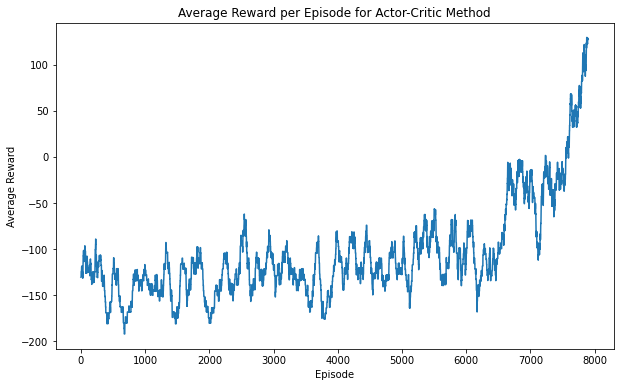

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(moving_average(ac.reward, n=100))
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Average Reward per Episode for Actor-Critic Method")
plt.show()

## Actor Critic With Function Appriximation

In [141]:

# Actor Critic Algorithm class
class Actor_Critic(object):
    # Main class to train the TD algorithm for the n number of episodes
    # the class takes the policy, alpha and lambda as the input
    def __init__(self, means, cov, gamma, alpha_critic, alpha_actor, env, state_space, steps,  order=3, actions=8, plot=False, discount=0.99, lambda_=0.1):
        self.means = means
        self.cov = cov
        self.alpha_critic = alpha_critic
        self.alpha_actor = alpha_actor
        self.gamma = gamma
        self.env = env
        self.state_space = state_space
        self.steps = steps
        self.lambda_ = lambda_
        self.td_error = []
        self.reward = []
        self.order = order
        self.probs = [0.25, 0.25, 0.25, 0.25]
        self.plot = plot
        self.discount = discount
        self.actions = actions
        # self.q_value = np.random.uniform(0, 1, size= (state_space, actions))
        self.w = np.zeros((len(self.means),1))
        self.theta = np.zeros((len(self.means),1))
        self.eligibility_v = np.zeros((self.state_space, 1))
        self.eligibility_theta = np.zeros((self.state_space, self.actions))
        self.normalization_min = np.array([-1.2, -0.07])
        self.normalization_denominator = np.array([2.4, 0.14])

    def RBF(self, state_action):
        Phi_vec=[] 
        state_action = np.array(state_action)
        for i in range(len(self.means)): 
            Phi_i=np.exp(-1/2*np.dot(np.dot(np.array(state_action-self.means[i]),np.linalg.pinv(self.cov)),np.array(state_action-self.means[i]))) 
            Phi_vec.append(np.array(Phi_i)) 
        Phi_vec = np.array(Phi_vec)+0.001
        return Phi_vec

    def train(self, episodes):
        # Method to run the actor critic algorithm for n episodes
        # input: episodes, trails
        # return: None
        for i in range(episodes):
            state = self.env.reset() # reset the environment
            state = map_state(state)
            # While we do not reach the terminal state
            # Getting action
            # local variable to store the variable
            count = 0 # count
            episode_reward = 0 # episode reward
            steps = 0
            ep_reward = []
            while steps < self.steps:
                steps += 1
                action, policy= self.sampleActionGrid(state)
                # Getting action # todo make changes as per policy softmax check the implementation
      
                # performing the action in the environment and observing the reward and moving to the new state s_prime
                new_state, reward,done, status = self.env.step(action)
                ep_reward.append(reward)
                new_state = map_state(new_state)
                count += 1
                episode_reward += (self.discount**count)*reward
                # print(episode_reward)
                if done:
                    print(f"episode {i} - steps: {steps} - episode_reward = {np.sum(ep_reward)}")
                    self.update(reward, state, action)
                    break

                # update the q values according to the previous state and new state
                self.update(reward, state, action, new_state)

                # changing the last state to new state
                state = new_state

            self.reward.append(np.sum(ep_reward))

    def update(self, reward, s, action, new_s=None, policy=None):
        # Update the value function
        # input: reward, curr_state, and new state
        # return: None (update)
        # gettting the last value and new value
        curr_state_value = np.dot(self.RBF([s, action]),self.w)
        if new_s:
          action_, pol_ = self.sampleActionGrid(new_s)
          next_state_value = np.dot(self.RBF([new_s, action_]),self.w)

        # computing the td error
        if new_s:
            delta_t = reward + self.gamma*next_state_value - curr_state_value   # td error
        else:
            delta_t = reward

        # updating the value function if episode is under 100 else calculating
        # the squared error and adding the value to the td_error list.
        # Critic Update using TD(lambda)
        self.w = self.w + self.alpha_critic * delta_t * self.RBF([s, action])
        # actor update
        #print(self.theta.shape)
        self.theta = self.theta + self.alpha_actor * np.dot(np.dot(self.RBF([s, action]), self.w),self.RBF([s, action]).T)
        #print(self.theta.shape)

    #tabular
    def sampleActionGrid(self, state, e_greedy=True):
        policy = self.softmax(np.array([np.dot(self.RBF([state, i]).T, self.theta) for i in range(self.actions)]))

        action = np.random.choice(list(range(self.actions)), p=policy.reshape(-1))
        return action, policy

    def softmax(self, x, sigma=0.1):
        x = sigma*x
        mx = np.max(x, axis=-1, keepdims=True)
        numerator = np.exp(x)
        denominator = np.sum(numerator, keepdims=True)
        theta_k = numerator / denominator
        return theta_k

    def plotTdError(self):
        plt.plot(self.td_error)
        plt.show()

    def saveTDerror(self):
        if self.env.name == "cart":
            name = "TD_error/grid" + "_" + str(self.order) + "_" + str(self.alpha) + ".p"
        else:
            name = "TD_error/grid" + "_" + str(self.alpha) + ".p"
        pickle.dump(self.td_error, open(name , "wb"))

In [142]:
env = MazeEnv()
env.reset()
ac = Actor_Critic(np.array([[1,1], [4,4], [8,8]]),
                  np.identity(2),
                  0.1, 
                  0.0001, 
                  0.001, 
                  env, 
                  env.world.shape[0]*env.world.shape[1],
                  300,
                  lambda_ = 0.99)

In [ ]:
ac.train(8000)

Streaming output truncated to the last 5000 lines.
episode 3000 - steps: 22 - episode_reward = -221
episode 3001 - steps: 17 - episode_reward = -216
episode 3002 - steps: 65 - episode_reward = 336
episode 3003 - steps: 11 - episode_reward = -210
episode 3004 - steps: 10 - episode_reward = -209
episode 3005 - steps: 11 - episode_reward = -210
episode 3006 - steps: 34 - episode_reward = -233
episode 3007 - steps: 22 - episode_reward = -221
episode 3008 - steps: 38 - episode_reward = 363
episode 3009 - steps: 79 - episode_reward = -278
episode 3010 - steps: 22 - episode_reward = -221
episode 3011 - steps: 12 - episode_reward = -211
episode 3012 - steps: 34 - episode_reward = -233
episode 3013 - steps: 51 - episode_reward = 350
episode 3014 - steps: 36 - episode_reward = 365
episode 3015 - steps: 22 - episode_reward = -221
episode 3016 - steps: 8 - episode_reward = -207
episode 3017 - steps: 42 - episode_reward = 359
episode 3018 - steps: 19 - episode_reward = -218
episode 3019 - steps: 42

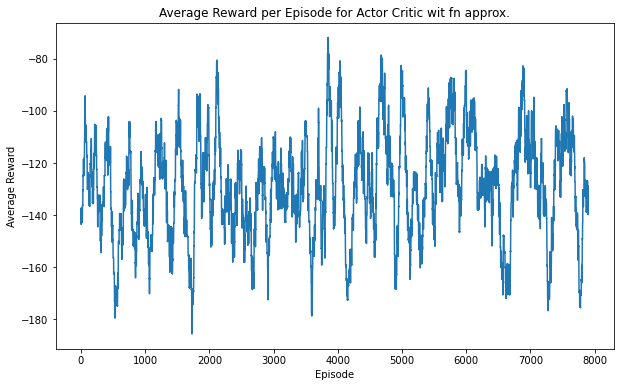

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(moving_average(ac.reward, n=100), label = 'alpha = 0.2')
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Average Reward per Episode for Actor Critic wit fn approx.")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(moving_average(rewards[0], n=100), label = 'alpha = 0.2')
plt.plot(moving_average(rewards[1], n=100), label = 'alpha = 0.4')
plt.plot(moving_average(rewards[2], n=100), label = 'alpha = 0.6')
plt.plot(moving_average(rewards[3], n=100), label = 'alpha = 0.8')
plt.plot(moving_average(rewards[4], n=100), label = 'alpha = 0.9')
plt.ylabel('Average Reward')
plt.xlabel('Episode')
plt.title("Average Reward per Episode for different learning rates")
plt.legend()
plt.plot

## Multi Agent Algorithms

In [144]:
class MazeEnv(gym.Env):
  def __init__(self, multi_agent = False):
    self.multi_agent = multi_agent
    self.action_space = spaces.Discrete(8)
    self.observation_space = spaces.Box(low=0,
    high=10,
    shape=(11, 10),
    dtype=np.int16)
    self.reward_range = (-200, 200)
    self.current_episode = 0
    self.success_episode = []

  def reset(self):
    self.current_player = 1
    # P means the game is playable, W means somenone wins, L someone lose
    self.state = 'P'
    self.current_step = 0
    self.max_step = 200
    if self.multi_agent:
      self.world = np.array([[1, 0, 0, 3, 3, 0, 0, 2],
                            [0, 0, 0, 3, 3, 0, 0, 0],
                            [0, 0, 0, 3, 3, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 4, 0, 0, 4, 0, 0]])
    else:
      self.world = np.array([[1, 0, 0, 3, 3, 3, 0, 0],
                            [0, 0, 0, 3, 3, 3, 0, 0],
                            [0, 0, 0, 3, 3, 3, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 4, 0, 0, 0]])
    return self._next_observation()

  def _next_observation(self):
    #obs = self.world
    #obs = np.append(obs, [[self.current_player, 0, 0, 0]], axis=0)

    return np.where(self.world == 1), np.where(self.world == 2)
  def _take_action(self, action):
        current_pos = np.where(self.world == self.current_player)

        if action == 0:
            next_pos = (current_pos[0] - 1, current_pos[1])

            if next_pos[0] >= 0 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[0] >= 0 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[0] >= 0 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[0] >= 0 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'

        elif action == 1:
            next_pos = (current_pos[0], current_pos[1] + 1)

            if next_pos[1] < self.world.shape[1]-1 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[1] < self.world.shape[1]-1 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[1] < self.world.shape[1]-1 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[1] < self.world.shape[1]-1 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'

        elif action == 2:
            next_pos = (current_pos[0] + 1, current_pos[1])

            if next_pos[0] <= self.world.shape[0]-1 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[0] <= self.world.shape[0]-1 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[0] <= self.world.shape[0]-1 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[0] <= self.world.shape[0]-1 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'

        elif action == 3:
            next_pos = (current_pos[0], current_pos[1] - 1)

            if next_pos[1] >= 0 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[1] >= 0 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[1] >= 0 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[1] >= 0 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'
        elif action == 4:
            next_pos = (current_pos[0]-1, current_pos[1] - 1)

            if next_pos[1] >= 0 and next_pos[0] >= 0 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[1] >= 0 and next_pos[0] >= 0 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[1] >= 0 and next_pos[0] >= 0 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[1] >= 0 and next_pos[0] >= 0 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'

        elif action == 5:
            next_pos = (current_pos[0]+1, current_pos[1] - 1)

            if next_pos[1] >= 0 and next_pos[0] <= self.world.shape[0]-1 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[1] >= 0 and next_pos[0] <= self.world.shape[0]-1 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[1] >= 0 and next_pos[0] <= self.world.shape[0]-1 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[1] >= 0 and next_pos[0] <= self.world.shape[0]-1 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'
        elif action == 6:
            next_pos = (current_pos[0]+1, current_pos[1] + 1)
            if next_pos[0]>self.world.shape[0]-1 or next_pos[1]>self.world.shape[1]-1:
              pass
            if next_pos[1] <= self.world.shape[0]-1 and next_pos[0] <= self.world.shape[0]-1 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[1] <= self.world.shape[0]-1 and next_pos[0] <= self.world.shape[0]-1 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[1] <= self.world.shape[0]-1 and next_pos[0] <= self.world.shape[0]-1 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[1] <= self.world.shape[0]-1 and next_pos[0] <= self.world.shape[0]-1 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'
        elif action == 7:
            next_pos = (current_pos[0]-1, current_pos[1] + 1)

            if next_pos[1] <= self.world.shape[0]-1 and next_pos[0] >= 0 and int(self.world[next_pos]) == 0:
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0

            elif next_pos[1] <= self.world.shape[0]-1 and next_pos[0] >= 0 and int(self.world[next_pos]) in (1, 2):
                pass

            elif next_pos[1] <= self.world.shape[0]-1 and next_pos[0] >= 0 and (int(self.world[next_pos]) == 3):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'L'

            elif next_pos[1] <= self.world.shape[0]-1 and next_pos[0] >= 0 and (int(self.world[next_pos]) == 4):
                self.world[next_pos] = self.current_player
                self.world[current_pos] = 0
                self.state = 'W'
        

  def step(self, action):
        
        rewards = []
        obss = []
        dones = []
        for i in range(len(action)):
          self.current_player = i +1
          self._take_action(action[i])
          self.current_step += 1
          #print(self.world)

          if self.state == "W":
            #print(f'Player {self.current_player} won')
            reward = 400
            done = True
          elif self.state == 'L':
            #print(f'Player {self.current_player} lost')
            reward = -200
            done = True
          elif self.state == 'P':
            reward = -1
            done = False

          if self.current_step >= self.max_step:
            done = True
          rewards.append(reward)
          dones.append(done)
        #if self.multi_agent:
        #  if self.current_player == 1:
        #    self.current_player = 2
        #  else:
        #    self.current_player = 1

          if done:
            #self.render_episode(self.state)
            self.current_episode += 1

          obs = self._next_observation()
          obss.append(obs[i])

        return obss, rewards, dones, {}


In [145]:
env = MazeEnv(multi_agent=True)

In [146]:
env.reset()

((array([0]), array([0])), (array([0]), array([7])))

## On-Policy Method (SARSA)

In [147]:
class sarsa_q_agent():
    def __init__(self, discount_factor, num_episodes,alpha, environment):
        self.discount_factor = discount_factor
        self.num_episodes = num_episodes
        self.env = environment
        self.alpha = alpha
        
 
    def epsilon_greedy(self,Q, epsilon, n_actions, state, action2):

        if np.random.rand() < epsilon:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax([Q[state][i][action2] for i in range(n_actions)])
        return action 

    def sarsa(self,env, alpha, gamma,  episodes):
    
        n_states, n_actions = env.world.shape[0]*env.world.shape[0], env.action_space.n
        Qa = np.zeros((n_states, n_actions, n_actions))
        Qb = np.zeros((n_states, n_actions, n_actions))
        epsilons = 0.5
        timestep_reward1 = []
        timestep_reward2 = []
        a2 = np.random.randint(0, n_actions)
        for episode in range(episodes):
            print(f"Episode: {episode}")
            s = env.reset()
            s1, s2 = map_state(s[0]), map_state(s[1])
            t = 0
            total_reward1 = 0
            total_reward2 = 0
            if (episode+1)% 1500 == 0 :
                  epsilons *= 0.5
            while True:
                a1 = self.epsilon_greedy(Qa, epsilons, n_actions, s1 , a2)
                a2 = self.epsilon_greedy(Qb, epsilons, n_actions, s2, a1)
                t += 1
                s_, reward, done, info = env.step([a1, a2])
                s_1, s_2 = map_state(s_[0]), map_state(s_[1])
                reward1, reward2 = reward[0], reward[1]
                total_reward1 += reward1
                total_reward2 += reward2
                aa_ = self.epsilon_greedy(Qa, epsilons, n_actions, s_1 , a2)
                ab_ = self.epsilon_greedy(Qb, epsilons, n_actions, s_2 , aa_)

                Qa[s1, a1, a2] = (1- alpha) *Qa[s1, a1, a2]  + alpha * ( reward1+ (gamma * Qb[s_1, aa_, ab_])  )
                Qb[s2, a2, a1] += (1 - alpha)* Qb[s2, a2, a1] + alpha * ( reward2 + (gamma * Qa[s_2,ab_, aa_])  )
                s1, s2=  s_1, s_2
                if done[0] or done[1]:
                    print(f"This episode took {t} timesteps and reward1: {total_reward1} reward2: {total_reward2}")
                    break
            timestep_reward1.append(total_reward1)
            timestep_reward2.append(total_reward2)
                
        return timestep_reward1, timestep_reward2



    def take_action(self):
        
        rewards = self.sarsa(self.env, self.alpha, self.discount_factor, self.num_episodes)
        
        return rewards

In [148]:
minmax = sarsa_q_agent(0.99, 8000,0.1, env)

In [ ]:
r1, r2 = minmax.take_action()

Streaming output truncated to the last 5000 lines.
This episode took 3 timesteps and reward1: -3 reward2: -202
Episode: 3528
This episode took 5 timesteps and reward1: -5 reward2: -204
Episode: 3529
This episode took 18 timesteps and reward1: 383 reward2: 383
Episode: 3530
This episode took 14 timesteps and reward1: -14 reward2: 387
Episode: 3531
This episode took 11 timesteps and reward1: 390 reward2: 390
Episode: 3532
This episode took 3 timesteps and reward1: -3 reward2: -202
Episode: 3533
This episode took 22 timesteps and reward1: -22 reward2: 379
Episode: 3534
This episode took 12 timesteps and reward1: -12 reward2: 389
Episode: 3535
This episode took 11 timesteps and reward1: -11 reward2: -210
Episode: 3536
This episode took 12 timesteps and reward1: 389 reward2: 389
Episode: 3537
This episode took 20 timesteps and reward1: -20 reward2: 381
Episode: 3538
This episode took 14 timesteps and reward1: -14 reward2: 387
Episode: 3539
This episode took 15 timesteps and reward1: -15 rew

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in double_scalars


This episode took 20 timesteps and reward1: -20 reward2: 381
Episode: 6028
This episode took 10 timesteps and reward1: 391 reward2: 391
Episode: 6029
This episode took 7 timesteps and reward1: -7 reward2: -206
Episode: 6030
This episode took 10 timesteps and reward1: -10 reward2: -209
Episode: 6031
This episode took 10 timesteps and reward1: -10 reward2: -209
Episode: 6032
This episode took 6 timesteps and reward1: -6 reward2: -205
Episode: 6033
This episode took 11 timesteps and reward1: 390 reward2: -210
Episode: 6034
This episode took 15 timesteps and reward1: -15 reward2: 386
Episode: 6035
This episode took 10 timesteps and reward1: 391 reward2: 391
Episode: 6036
This episode took 11 timesteps and reward1: -11 reward2: 390
Episode: 6037
This episode took 10 timesteps and reward1: 391 reward2: 391
Episode: 6038
This episode took 9 timesteps and reward1: -9 reward2: 392
Episode: 6039
This episode took 27 timesteps and reward1: 374 reward2: 374
Episode: 6040
This episode took 15 times

[]

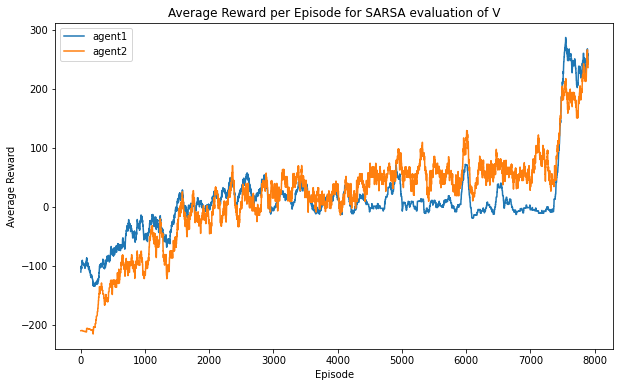

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(moving_average(r1, n=100), label = 'agent1')
plt.plot(moving_average(r2, n=100), label='agent2')
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Average Reward per Episode for SARSA evaluation of V")
plt.legend()
plt.plot()

## MIN-MAX Q Leaning

In [150]:
class minmax_q_agent():
    def __init__(self, discount_factor, num_episodes,alpha, environment):
        self.discount_factor = discount_factor
        self.num_episodes = num_episodes
        self.env = environment
        self.alpha = alpha
        
 
    def epsilon_greedy(self,Q, epsilon, n_actions, state, action2):

        if np.random.rand() < epsilon:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax([Q[state][i][action2] for i in range(n_actions)])
        return action 

    def sarsa(self,env, alpha, gamma,  episodes):
    
        n_states, n_actions = env.world.shape[0]*env.world.shape[0], env.action_space.n
        Qa = np.zeros((n_states, n_actions, n_actions))
        Qb = np.zeros((n_states, n_actions, n_actions))
        epsilons = 0.35
        timestep_reward1 = []
        timestep_reward2 = []
        a2 = np.random.randint(0, n_actions)
        for episode in range(episodes):
            print(f"Episode: {episode}")
            s = env.reset()
            s1, s2 = map_state(s[0]), map_state(s[1])
            t = 0
            total_reward1 = 0
            total_reward2 = 0
            if (episode+1)% 1500 == 0 :
              epsilons *= 0.5
            while True:
                a1 = self.epsilon_greedy(Qa, epsilons, n_actions, s1 , a2)
                a2 = self.epsilon_greedy(Qb, epsilons, n_actions, s2, a1)
                t += 1
                s_, reward, done, info = env.step([a1, a2])
                s_1, s_2 = map_state(s_[0]), map_state(s_[1])
                reward1, reward2 = reward[0], reward[1]
                total_reward1 += reward1
                total_reward2 += reward2
                #aa_ = self.epsilon_greedy(Qa, epsilons, n_actions, s_1 , a2)
                #ab_ = self.epsilon_greedy(Qb, epsilons, n_actions, s_2 , aa_)
                aa_ = np.argmax(np.min(Qb[s_1,:,:], axis=1))
                ab_ = np.argmax(np.min(Qa[s_2,:,:], axis=1))

                Qa[s1, a1, a2] = (1- alpha) *Qa[s1, a1, a2]  + alpha * ( reward1+ (gamma * Qa[s_1, aa_, ab_])  )
                Qb[s2, a2, a1] += (1 - alpha)* Qb[s2, a2, a1] + alpha * ( reward2 + (gamma * Qb[s_2,ab_, aa_])  )
                s1, s2=  s_1, s_2
                if done[0] or done[1]:
                    print(f"This episode took {t} timesteps and reward1: {total_reward1} reward2: {total_reward2}")
                    break
            timestep_reward1.append(total_reward1)
            timestep_reward2.append(total_reward2)
                
        return timestep_reward1, timestep_reward2



    def take_action(self):
        
        rewards = self.sarsa(self.env, self.alpha, self.discount_factor, self.num_episodes)
        
        return rewards

In [ ]:
minmax = minmax_q_agent(0.99, 8000,0.01, env)
r1_minmax, r2_minmax = minmax.take_action()


Episode: 0
This episode took 15 timesteps and reward1: -214 reward2: -214
Episode: 1
This episode took 17 timesteps and reward1: -216 reward2: -216
Episode: 2
This episode took 11 timesteps and reward1: -11 reward2: -210
Episode: 3
This episode took 7 timesteps and reward1: -206 reward2: -206
Episode: 4
This episode took 15 timesteps and reward1: -15 reward2: -214
Episode: 5
This episode took 19 timesteps and reward1: -218 reward2: -218
Episode: 6
This episode took 17 timesteps and reward1: -17 reward2: -216
Episode: 7
This episode took 5 timesteps and reward1: -204 reward2: -204
Episode: 8
This episode took 14 timesteps and reward1: -14 reward2: -213
Episode: 9
This episode took 15 timesteps and reward1: -214 reward2: -214
Episode: 10
This episode took 11 timesteps and reward1: -210 reward2: -210
Episode: 11
This episode took 14 timesteps and reward1: -213 reward2: -213
Episode: 12
This episode took 6 timesteps and reward1: -205 reward2: -205
Episode: 13
This episode took 7 timesteps 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in double_scalars


Streaming output truncated to the last 5000 lines.
Episode: 5500
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5501
This episode took 8 timesteps and reward1: 393 reward2: 393
Episode: 5502
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5503
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5504
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5505
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5506
This episode took 8 timesteps and reward1: 393 reward2: 393
Episode: 5507
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5508
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5509
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5510
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5511
This episode took 8 timesteps and reward1: 393 reward2: 393
Episode: 5512
This episode took 7 timesteps and reward1: 394 

[]

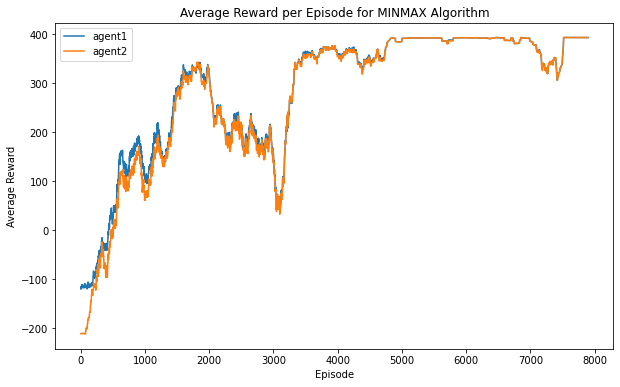

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(moving_average(r1_minmax, n=100), label = 'agent1')
plt.plot(moving_average(r2_minmax, n=100), label='agent2')
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Average Reward per Episode for MINMAX Algorithm")
plt.legend()
plt.plot()

## Belief Based Algorithm

In [152]:
class blief_based_q_agent():
    def __init__(self, discount_factor, num_episodes,alpha, environment):
        self.discount_factor = discount_factor
        self.num_episodes = num_episodes
        self.env = environment
        self.alpha = alpha
        
 
    def epsilon_greedy(self,Q, epsilon, n_actions, state, action2):

        if np.random.rand() < epsilon:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax([Q[state][i][action2] for i in range(n_actions)])
        return action 

    def sarsa(self,env, alpha, gamma,  episodes):
    
        n_states, n_actions = env.world.shape[0]*env.world.shape[0], env.action_space.n
        Qa = np.zeros((n_states, n_actions, n_actions))
        Qb = np.zeros((n_states, n_actions, n_actions))
        epsilons = 0.55
        timestep_reward1 = []
        timestep_reward2 = []
        a2 = np.random.randint(0, n_actions)
        a1_acc = [0 for i in range(n_actions)]
        a2_acc = [0 for i in range(n_actions)]
        for episode in range(episodes):
            print(f"Episode: {episode}")
            s = env.reset()
            s1, s2 = map_state(s[0]), map_state(s[1])
            t = 0
            total_reward1 = 0
            total_reward2 = 0
            if (episode+1)% 1500 == 0 :
              epsilons *= 0.5
            while True:
                a1 = self.epsilon_greedy(Qa, epsilons, n_actions, s1 , a2)
                a2 = self.epsilon_greedy(Qb, epsilons, n_actions, s2, a1)
                t += 1
                s_, reward, done, info = env.step([a1, a2])
                a1_acc[a1] +=1
                a2_acc[a2] +=1
                s_1, s_2 = map_state(s_[0]), map_state(s_[1])
                reward1, reward2 = reward[0], reward[1]
                total_reward1 += reward1
                total_reward2 += reward2
                #aa_ = self.epsilon_greedy(Qa, epsilons, n_actions, s_1 , a2)
                #ab_ = self.epsilon_greedy(Qb, epsilons, n_actions, s_2 , aa_)
                aa_ = np.argmax([np.sum([Qa[s_1][i][j]*a2_acc[j] for j in range(n_actions)]) for i in range(n_actions)])
                ab_ = np.argmax([np.sum([Qb[s_2][i][j]*a1_acc[j] for j in range(n_actions)]) for i in range(n_actions)])

                # v[state_p] = np.argmax([np.sum([Q_sa[i][j][state]*p[j] for j in range(self.action_count)]) for i in range(self.action_count)])

                Qa[s1, a1, a2] = (1- alpha) *Qa[s1, a1, a2]  + alpha * ( reward1+ (gamma * Qa[s_1, aa_, ab_])  )
                Qb[s2, a2, a1] += (1 - alpha)* Qb[s2, a2, a1] + alpha * ( reward2 + (gamma * Qb[s_2,ab_, aa_])  )
                s1, s2=  s_1, s_2
                if done[0] or done[1]:
                    print(f"This episode took {t} timesteps and reward1: {total_reward1} reward2: {total_reward2}")
                    break
            timestep_reward1.append(total_reward1)
            timestep_reward2.append(total_reward2)
                
        return timestep_reward1, timestep_reward2



    def take_action(self):
        
        rewards = self.sarsa(self.env, self.alpha, self.discount_factor, self.num_episodes)
        
        return rewards

In [ ]:
belief = blief_based_q_agent(0.99, 8000,0.1, env)
r1_b, r2_b = belief.take_action()


Episode: 0
This episode took 11 timesteps and reward1: -210 reward2: -210
Episode: 1
This episode took 11 timesteps and reward1: -210 reward2: -210
Episode: 2
This episode took 6 timesteps and reward1: -205 reward2: -205
Episode: 3
This episode took 10 timesteps and reward1: -209 reward2: -209
Episode: 4
This episode took 8 timesteps and reward1: -207 reward2: -207
Episode: 5
This episode took 23 timesteps and reward1: -222 reward2: -222
Episode: 6
This episode took 3 timesteps and reward1: -3 reward2: -202
Episode: 7
This episode took 21 timesteps and reward1: -220 reward2: -220
Episode: 8
This episode took 6 timesteps and reward1: -205 reward2: -205
Episode: 9
This episode took 4 timesteps and reward1: -4 reward2: -203
Episode: 10
This episode took 23 timesteps and reward1: -222 reward2: -222
Episode: 11
This episode took 9 timesteps and reward1: -9 reward2: -208
Episode: 12
This episode took 6 timesteps and reward1: -6 reward2: -205
Episode: 13
This episode took 7 timesteps and rewa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in double_scalars


This episode took 10 timesteps and reward1: 391 reward2: 391
Episode: 1766
This episode took 12 timesteps and reward1: 389 reward2: 389
Episode: 1767
This episode took 9 timesteps and reward1: 392 reward2: 392
Episode: 1768
This episode took 10 timesteps and reward1: 391 reward2: 391
Episode: 1769
This episode took 8 timesteps and reward1: 393 reward2: 393
Episode: 1770
This episode took 9 timesteps and reward1: 392 reward2: 392
Episode: 1771
This episode took 8 timesteps and reward1: 393 reward2: 393
Episode: 1772
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 1773
This episode took 10 timesteps and reward1: 391 reward2: 391
Episode: 1774
This episode took 10 timesteps and reward1: 391 reward2: 391
Episode: 1775
This episode took 13 timesteps and reward1: 388 reward2: 388
Episode: 1776
This episode took 9 timesteps and reward1: 392 reward2: 392
Episode: 1777
This episode took 10 timesteps and reward1: 391 reward2: 391
Episode: 1778
This episode took 11 timesteps 

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Streaming output truncated to the last 5000 lines.
Episode: 5500
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5501
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5502
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5503
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5504
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5505
This episode took 9 timesteps and reward1: 392 reward2: 392
Episode: 5506
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5507
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5508
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5509
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5510
This episode took 8 timesteps and reward1: 393 reward2: 393
Episode: 5511
This episode took 7 timesteps and reward1: 394 reward2: 394
Episode: 5512
This episode took 7 timesteps and reward1: 394 

[]

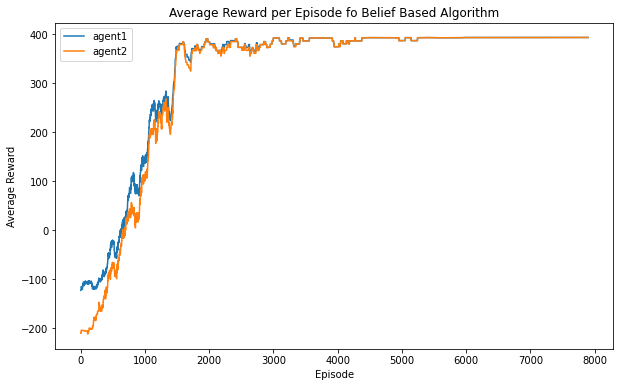

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(moving_average(r1_b, n=100), label = 'agent1')
plt.plot(moving_average(r2_b, n=100), label='agent2')
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Average Reward per Episode fo Belief Based Algorithm")
plt.legend()
plt.plot()

## Networked Actor-Critic

In [127]:

# Actor Critic Algorithm class
class Actor_Critic(object):
    # Main class to train the TD algorithm for the n number of episodes
    # the class takes the policy, alpha and lambda as the input
    def __init__(self, gamma, alpha_critic, alpha_actor, env, state_space, steps,  order=3, actions=8, plot=False, discount=0.99, lambda_=0.1):
        self.alpha_critic = alpha_critic
        self.alpha_actor = alpha_actor
        self.gamma = gamma
        self.env = env
        self.state_space = state_space
        self.steps = steps
        self.lambda_ = lambda_
        self.td_error = []
        self.reward1 = []
        self.reward2 = []
        self.order = order
        self.plot = plot
        self.discount = discount
        self.actions = actions
        # self.q_value = np.random.uniform(0, 1, size= (state_space, actions))
        self.w1, self.w2 = np.zeros((self.state_space, 1)), np.zeros((self.state_space, 1))
        self.theta1, self.theta2 = np.zeros((self.state_space, self.actions)), np.zeros((self.state_space, self.actions))
        self.eligibility_v1, self.eligibility_v2 = np.zeros((self.state_space, 1)), np.zeros((self.state_space, 1))
        self.eligibility_theta1, self.eligibility_theta2 = np.zeros((self.state_space, self.actions)), np.zeros((self.state_space, self.actions))
        self.mu = np.array([0, 0])

    def train(self, episodes):
        # Method to run the actor critic algorithm for n episodes
        # input: episodes, trails
        # return: None
        for i in range(episodes):
            state = self.env.reset() # reset the environment
            s1, s2 = map_state(state[0]), map_state(state[1])
            # While we do not reach the terminal state
            # Getting action
            self.eligibility_v1, self.eligibility_v2 = np.zeros((self.state_space, 1)), np.zeros((self.state_space, 1))
            self.eligibility_theta1, self.eligibility_theta2 = np.zeros((self.state_space, self.actions)), np.zeros((self.state_space, self.actions))

            # local variable to store the variable
            count = 0 # count
            episode_reward1 = 0 # episode reward
            episode_reward2 = 0
            steps = 0
            ep_reward1 = []
            ep_reward2 = []
            while steps < self.steps:
                steps += 1
                action1, policy= self.sampleActionGrid1(s1)
                action2, policy= self.sampleActionGrid2(s2)
                # Getting action # todo make changes as per policy softmax check the implementation
      
                # performing the action in the environment and observing the reward and moving to the new state s_prime
                new_state, reward,done, status = self.env.step([action1, action2])
                r1, r2 = reward[0], reward[1]
                s_1, s_2 = map_state(new_state[0]), map_state(new_state[1])
                ep_reward1.append(r1)
                ep_reward2.append(r2)
                self.mu[0] = (1-self.alpha_critic)*self.mu[0] + self.alpha_critic * r1
                self.mu[1] = (1-self.alpha_critic)*self.mu[1] + self.alpha_critic * r2
                action1_, policy= self.sampleActionGrid1(s_1)
                action2_, policy= self.sampleActionGrid2(s_2)
                count += 1
                episode_reward1 += (self.discount**count)*r1
                episode_reward2 += (self.discount**count)*r2
                # print(episode_reward)
                if done[0] or done[1]:
                    print(f"episode {i} - steps: {steps} - agent 1 episode_reward = {np.sum(ep_reward1)} - agent 2 episode_reward = {np.sum(ep_reward2)}")
                    self.update1(r1, s1, action1)
                    self.update1(r2, s2, action2)
                    break

                # update the q values according to the previous state and new state
                self.update1(r1, s1, action1_, s_1)
                self.update2(r2, s2, action2_, s_2)


                # changing the last state to new state
                state = new_state
            self.global_w = (self.w1 + self.w2)/2
            self.w1, self.w2 = self.global_w.copy(), self.global_w.copy()

            self.reward1.append(np.sum(ep_reward1))
            self.reward2.append(np.sum(ep_reward2))

    def update1(self, reward, s, action, new_s=None, policy=None):
        # Update the value function
        # input: reward, curr_state, and new state
        # return: None (update)
        # gettting the last value and new value
        curr_state_value = self.w1[s][0]
        next_state_value = self.w1[new_s][0]

        # computing the td error
        if new_s:
            delta_t = reward - self.mu[0] + self.gamma*next_state_value - curr_state_value   # td error
        else:
            delta_t = reward

        # updating the value function if episode is under 100 else calculating
        # the squared error and adding the value to the td_error list.
        # Critic Update using TD(lambda)
        self.eligibility_v1 = self.gamma * self.lambda_ * self.eligibility_v1
        self.eligibility_v1 += 1
        self.w1 = self.w1 + self.alpha_critic * delta_t * self.eligibility_v1

        # actor update
        # delta_pie = np.zeros((self.state_space, self.actions))
        delta_pie = -1*self.theta1[s] #todo check this calculation
        delta_pie[action] = 1 - delta_pie[action] # todo check this calculation

        self.eligibility_theta1 = self.gamma * self.lambda_ * self.eligibility_theta1 #(state * action)
        self.eligibility_theta1[s] += delta_pie
        self.theta1 = self.theta1 + self.alpha_actor * delta_t * self.eligibility_theta1


        self.td_error.append(0)

    def update2(self, reward, s, action, new_s=None, policy=None):
        # Update the value function
        # input: reward, curr_state, and new state
        # return: None (update)
        # gettting the last value and new value
        curr_state_value = self.w2[s][0]
        next_state_value = self.w2[new_s][0]

        # computing the td error
        if new_s:
            delta_t = reward - self.mu[1] + self.gamma*next_state_value - curr_state_value   # td error
        else:
            delta_t = reward

        # updating the value function if episode is under 100 else calculating
        # the squared error and adding the value to the td_error list.
        # Critic Update using TD(lambda)
        self.eligibility_v2 = self.gamma * self.lambda_ * self.eligibility_v2
        self.eligibility_v2 += 1
        self.w2 = self.w2 + self.alpha_critic * delta_t * self.eligibility_v2

        # actor update
        # delta_pie = np.zeros((self.state_space, self.actions))
        delta_pie = -1*self.theta2[s] #todo check this calculation
        delta_pie[action] = 1 - delta_pie[action] # todo check this calculation

        self.eligibility_theta2 = self.gamma * self.lambda_ * self.eligibility_theta2 #(state * action)
        self.eligibility_theta2[s] += delta_pie
        self.theta2 = self.theta2 + self.alpha_actor * delta_t * self.eligibility_theta2


        self.td_error.append(0)

    #tabular
    def sampleActionGrid1(self, state, e_greedy=True):
        policy = self.softmax(self.theta1[state])
        action = np.random.choice(self.env.action_space.n, p=policy)
        return action, policy
    
    def sampleActionGrid2(self, state, e_greedy=True):
        policy = self.softmax(self.theta2[state])
        action = np.random.choice(self.env.action_space.n, p=policy)
        return action, policy

    def softmax(self, x, sigma=0.01):
        x = sigma*x
        mx = np.max(x, axis=-1, keepdims=True)
        numerator = np.exp(x - mx)
        denominator = np.sum(numerator, axis=-1, keepdims=True)
        theta_k = numerator / denominator
        return theta_k

    def plotTdError(self):
        plt.plot(self.td_error)
        plt.show()

    def saveTDerror(self):
        if self.env.name == "cart":
            name = "TD_error/grid" + "_" + str(self.order) + "_" + str(self.alpha) + ".p"
        else:
            name = "TD_error/grid" + "_" + str(self.alpha) + ".p"
        pickle.dump(self.td_error, open(name , "wb"))

In [129]:
ac = Actor_Critic( 0.02, 
                  0.00005, 
                  0.00005, 
                  env, 
                  env.world.shape[0]*env.world.shape[1],
                  300,
                  lambda_ = 0.8)

In [130]:
ac.train(8000)

Streaming output truncated to the last 5000 lines.
episode 3000 - steps: 17 - agent 1 episode_reward = 384 - agent 2 episode_reward = 384
episode 3001 - steps: 32 - agent 1 episode_reward = -32 - agent 2 episode_reward = -231
episode 3002 - steps: 6 - agent 1 episode_reward = -205 - agent 2 episode_reward = -205
episode 3003 - steps: 7 - agent 1 episode_reward = -7 - agent 2 episode_reward = -206
episode 3004 - steps: 5 - agent 1 episode_reward = -5 - agent 2 episode_reward = -204
episode 3005 - steps: 23 - agent 1 episode_reward = -222 - agent 2 episode_reward = -222
episode 3006 - steps: 35 - agent 1 episode_reward = -35 - agent 2 episode_reward = 366
episode 3007 - steps: 6 - agent 1 episode_reward = -6 - agent 2 episode_reward = -205
episode 3008 - steps: 11 - agent 1 episode_reward = -11 - agent 2 episode_reward = -210
episode 3009 - steps: 4 - agent 1 episode_reward = -203 - agent 2 episode_reward = -203
episode 3010 - steps: 6 - agent 1 episode_reward = -6 - agent 2 episode_rewa

[]

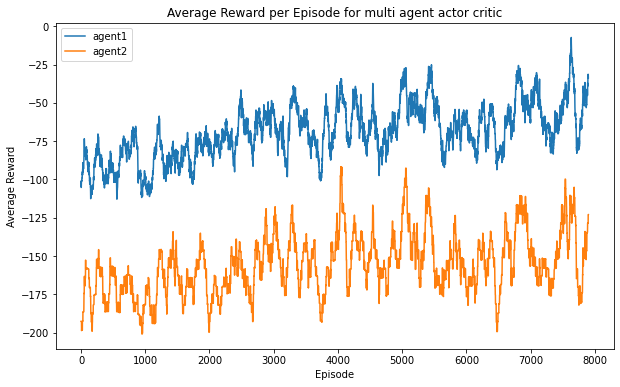

In [90]:
plt.figure(figsize=(10,6))
plt.plot(moving_average(ac.reward1, n=100), label = 'agent1')
plt.plot(moving_average(ac.reward2, n=100), label='agent2')
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Average Reward per Episode for multi agent actor critic")
plt.legend()
plt.plot()